<a href="https://colab.research.google.com/github/Vishvaish/Machine-Learning-Models/blob/main/Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Logistic Regression

Logistic Regression is a statistical method used for binary classification, where the goal is to predict the probability of an event occurring based on given input variables. The output of logistic regression is a probability value between 0 and 1, which can be interpreted as the likelihood of the event occurring.



#The formula for logistic regression is as follows:

p = 1 / (1 + e^(-z))

p = probability of the output variable taking the value 1

z = b0 + b1x1 + b2x2 + ... + bn*xn

b0, b1, b2, ..., bn = coefficients (weights) learned during training

x1, x2, ..., xn = input variables

The logistic function (also known as the sigmoid function) maps the output of the linear equation to a probability value between 0 and 1, which can be interpreted as the likelihood of the output variable taking the value 1.


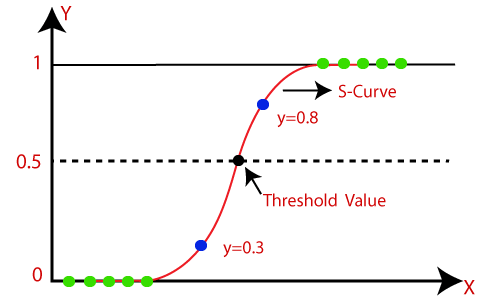


# Intention:

1. The code aims to implement logistic regression for binary classification for gender classification. 

2. The code loads the dataset using pandas, preprocesses the data by adding an intercept term to the features, initializes the model's parameters, trains the model using gradient descent, and finally evaluates the model's performance using the F1 score and by plotting the actual and predicted values.

In [ ]:
import pandas as pd
data = pd.read_csv('/content/gender_classification_v7.csv')
data.head()

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1,11.8,6.1,1,0,1,1,Male
1,0,14.0,5.4,0,0,1,0,Female
2,0,11.8,6.3,1,1,1,1,Male
3,0,14.4,6.1,0,1,1,1,Male
4,1,13.5,5.9,0,0,0,0,Female


In [ ]:
data['gender'] = data['gender'].map({'Male':0,'Female':1})

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Define the sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Define the cost function
def cost_function(theta, X, y):
    m = len(y)
    h = sigmoid(X.dot(theta))
    J = -(1/m) * (y.T.dot(np.log(h)) + (1-y).T.dot(np.log(1-h)))
    return J

# Define the gradient descent function
def gradient_descent(theta, X, y, alpha, num_iters):
    m = len(y)
    J_history = np.zeros((num_iters, 1))

    for i in range(num_iters):
        h = sigmoid(X.dot(theta))
        grad = (1/m) * X.T.dot(h - y)
        theta = theta - alpha * grad
        J_history[i] = cost_function(theta, X, y)

    return theta, J_history

# Split dataset into features and target
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values.reshape(-1, 1)

# Add intercept term to X
m = len(y)
X = np.hstack((np.ones((m, 1)), X))

# Initialize theta
initial_theta = np.zeros((X.shape[1], 1))

# Define hyperparameters
alpha = 0.01
num_iters = 1000

# Train the model
theta, J_history = gradient_descent(initial_theta, X, y, alpha, num_iters)

# Predict
y_pred = np.round(sigmoid(X.dot(theta)))

# Compute F1 score
tp = np.sum(np.logical_and(y_pred == 1, y == 1))
fp = np.sum(np.logical_and(y_pred == 1, y == 0))
fn = np.sum(np.logical_and(y_pred == 0, y == 1))
precision = tp / (tp + fp) if (tp + fp) > 0 else 0
recall = tp / (tp + fn) if (tp + fn) > 0 else 0
f1_score = 2 * precision * recall / (precision + recall) if (precision + recall) > 0 else 0
print('F1 score:', f1_score)

# Create actual and predicted dataframes
df_actual = pd.DataFrame({'Actual': y.reshape(-1)})
df_predicted = pd.DataFrame({'Predicted': y_pred.reshape(-1)})

# Create dataframe for actual and predicted values
df_result = pd.concat([df_actual, df_predicted], axis=1)
print(df_result.head())


F1 score: 0.9466019417475727
   Actual  Predicted
0       0        0.0
1       1        1.0
2       0        0.0
3       0        0.0
4       1        1.0


#Inference:

1. The code defines a sigmoid function that returns the output of the sigmoid function for a given input.

2. The code defines a cost function that calculates the cost of logistic regression for a given set of parameters, features, and target variables.

3. The code defines a gradient descent function that uses the cost function and the sigmoid function to train the model and optimize the parameters using gradient descent.

4. The code loads the dataset and preprocesses the data by adding an intercept term to the features.

5. The code initializes the model's parameters, learning rate, and the number of iterations.

6. The code trains the model using gradient descent.

7. The code predicts the target variable using the trained model.
The code evaluates the model's performance using the F1 score. 

#Pros of Logistic Regression:

1. Simplicity: Logistic regression is a relatively simple and straightforward algorithm compared to other machine learning models. It is easy to implement and interpret, making it a good choice for beginners.

2. Interpretable results: Logistic regression provides interpretable results in terms of odds ratios and probabilities. It can help understand the relationship between the predictor variables and the likelihood of a particular outcome.

3. Efficiency: Logistic regression tends to be computationally efficient and can handle large datasets with a relatively small number of predictor variables.

4. Robustness to noise: Logistic regression is less prone to overfitting and can handle noisy data reasonably well. It is less affected by outliers compared to some other algorithms like decision trees.

5. Feature importance: Logistic regression can provide information about the importance of each predictor variable in predicting the outcome. This can help in feature selection and identifying the most influential factors.



---


#Cons of Logistic Regression:

1. Limited to linear relationships: Logistic regression assumes a linear relationship between the predictor variables and the log-odds of the outcome. It may not perform well when the relationship is highly nonlinear or complex.

2. Assumptions of independence: Logistic regression assumes that the observations are independent of each other. If there is dependence or correlation among the observations, such as in time series or clustered data, logistic regression may produce biased results.

3. Lack of flexibility: Logistic regression is a parametric model with a fixed functional form. It may not capture complex interactions or nonlinear patterns in the data as effectively as more flexible models like decision trees or neural networks.

4. Sensitivity to outliers: Although logistic regression is generally robust to outliers, extreme outliers can still have a significant impact on the estimated coefficients and predictions.

5. Imbalanced data: Logistic regression may struggle with imbalanced datasets, where the number of instances for each class is significantly different. The model tends to be biased towards the majority class, and additional techniques like resampling or adjusting class weights may be necessary.




